# Food Wastage Project

In this project, we will be predicting the percentage of the loss of quantity of yield belonging to farmers to grow their crops. The data is collected from '**The Food and Agriculture Organization of The United Nations**' and can be found [here](http://www.fao.org/platform-food-loss-waste/flw-data/en/). The target is a numerical and continous variable and the other independent variables are either of the `object` or `int`/`float` datatype. 

This is a surpervised regression problem where we will predict one output.

## Data Collection

### Reading in the data

We'll first load some standard libraries in, then read in the data as a dataframe. 


In [1]:
# upgrade scikit learn to use the latest regressors
# %pip install --upgrade scikit-learn

In [2]:
# loading in libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

# ignore some small warnings
import warnings
warnings.filterwarnings('ignore')

# set max rows and max columns to 250
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250

In [3]:
# read in the data
data = pd.read_csv('/content/Food_Waste_Data.csv')
data.head()

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


In [4]:
# printing number of rows and columns 
data.shape

(15156, 22)

### Spliting our data into train and test sets. 

In [5]:
# assigning 90% of our data for training and the rest for testing
from IPython.display import display

train_percent = int(90/100 * 15156)

train_set = data.iloc[:train_percent, :].copy()
test_set = data.iloc[train_percent:, :].copy()

display(train_set.head(), train_set.shape,
        test_set.head(), test_set.shape)

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,1.79775798,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,5.219074683,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,5.426717684,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,5.614486626,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


(13640, 22)

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,percentage_loss_of_quantity,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
13640,800,Uganda,NaN,113.0,Rice,2013,2.5,2.5,NaN,NaN,NaN,Winnowing,Farm,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13641,800,Uganda,NaN,113.0,Rice,2013,2.7,2.7,NaN,NaN,NaN,Market storage,Wholesale,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13642,800,Uganda,NaN,113.0,Rice,2013,3.1,3.1,NaN,NaN,NaN,Threshing & Shelling,Farm,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13643,800,Uganda,NaN,113.0,Rice,2013,4.4,4.4,NaN,NaN,NaN,Harvesting/field drying,Harvest,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13644,800,Uganda,NaN,114.0,Sorghum,2013,1.0,1,NaN,NaN,NaN,Transport to market,Transport,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...


(1516, 22)

### Brief statistical summary

We use the describe() function to get some descriptive statistics about both datasets for all their numerical variables.

In [6]:
display(train_set.describe(), test_set.describe())

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,treatment,units
count,13640.000000,13640.000000,13640.000000,13640.000000,0.0,0.0
mean,437.777786,720.003062,2008.290616,5.185795,NaN,NaN
std,234.129936,2130.608618,3.941373,7.398662,NaN,NaN
min,4.000000,111.000000,2000.000000,0.000000,NaN,NaN
25%,232.000000,112.000000,2005.000000,1.700000,NaN,NaN
50%,454.000000,114.000000,2009.000000,2.700000,NaN,NaN
75%,646.000000,1234.000000,2011.000000,4.900000,NaN,NaN
max,800.000000,21121.000000,2017.000000,77.650000,NaN,NaN


,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,treatment,units
count,1516.000000,1516.000000,1516.000000,1516.000000,0.0,0.0
mean,833.733509,756.794875,2008.491425,4.712876,NaN,NaN
std,22.565787,2549.169360,3.730959,6.429359,NaN,NaN
min,800.000000,111.000000,2000.000000,0.000000,NaN,NaN
25%,826.000000,112.000000,2006.000000,1.800000,NaN,NaN
50%,834.000000,115.000000,2009.000000,2.700000,NaN,NaN
75%,854.000000,1193.000000,2011.000000,4.400000,NaN,NaN
max,894.000000,21512.000000,2016.000000,58.700000,NaN,NaN


### seperate target from predictors

We'll seperate the target variable from the features in the train set and drop the target variable in the test set. Including the target in the test set will be like providing the answers to questions already present in an exam paper. We want the model to come up with answers on its own without help.

In [7]:
# seperate target from predictors
y = train_set.percentage_loss_of_quantity.copy()
train_features = train_set.drop('percentage_loss_of_quantity', axis=1)
test_features = test_set.drop('percentage_loss_of_quantity', axis=1)

display(y.head(), train_features.head(), test_features.head())

0     1.79775798
1     1.79775798
2    5.219074683
3    5.426717684
4    5.614486626
Name: percentage_loss_of_quantity, dtype: object

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
13640,800,Uganda,NaN,113.0,Rice,2013,2.5,NaN,NaN,NaN,Winnowing,Farm,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13641,800,Uganda,NaN,113.0,Rice,2013,2.7,NaN,NaN,NaN,Market storage,Wholesale,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13642,800,Uganda,NaN,113.0,Rice,2013,3.1,NaN,NaN,NaN,Threshing & Shelling,Farm,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13643,800,Uganda,NaN,113.0,Rice,2013,4.4,NaN,NaN,NaN,Harvesting/field drying,Harvest,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...
13644,800,Uganda,NaN,114.0,Sorghum,2013,1.0,NaN,NaN,NaN,Transport to market,Transport,NaN,NaN,NaN,NaN,NaN,Expert Opinon; Literature; Limited Sampling; E...,APHLIS,NaN,https://www.aphlis.net/en/page/2/country-table...


### Merging both training and test sets

Now we'll merge both the datasets for our preprocessing so that we don't have to perform the same operations twice.

In [8]:
features = pd.concat([train_features, test_features], axis=0)
display(features.head(), features.shape)

,geographicaream49,country,region,measureditemcpc,crop,timepointyears,loss_per_clean,loss_quantity,loss_qualitiative,loss_monetary,activity,fsc_location1,periodofstorage,treatment,causeofloss,samplesize,units,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,NaN
1,100,Bulgaria,NaN,111.0,Wheat,2000,1.80,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Reuter,FAO Sources,FAO Sources,NaN
2,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2009,5.22,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
3,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2008,5.43,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN
4,104,Myanmar,NaN,142.0,"Groundnuts, excluding shelled",2007,5.61,NaN,NaN,NaN,NaN,SWS_Total,NaN,NaN,NaN,NaN,NaN,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,NaN


(15156, 21)

### Calculate missing values
We'll use a function to calculate the number of missing values and their percentage according to the entire dataset of features.

In [9]:
# Calculate missing vlaues

def missing_percentage(df):
    
  """A function for returning missing ratios."""

  total = df.isnull().sum().sort_values(
      ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
  percent = (df.isnull().sum().sort_values(ascending=False) / len(df) *
              100)[(df.isnull().sum().sort_values(ascending=False) / len(df) *
                    100) != 0]
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
missing = missing_percentage(features)
display(missing.T.style.background_gradient(cmap='Reds', axis=1))

,units,treatment,loss_monetary,loss_qualitiative,periodofstorage,region,causeofloss,samplesize,loss_quantity,reference,activity,url,method_datacollection,fsc_location1
Total,15156.000000,15156.000000,15087.000000,15079.000000,15041.000000,14334.000000,14142.000000,14013.000000,13894.000000,9038.000000,5334.000000,4219.000000,2665.000000,148.000000
Percent,100.000000,100.000000,99.544735,99.491950,99.241225,94.576405,93.309580,92.458432,91.673265,59.633149,35.193983,27.837160,17.583795,0.976511


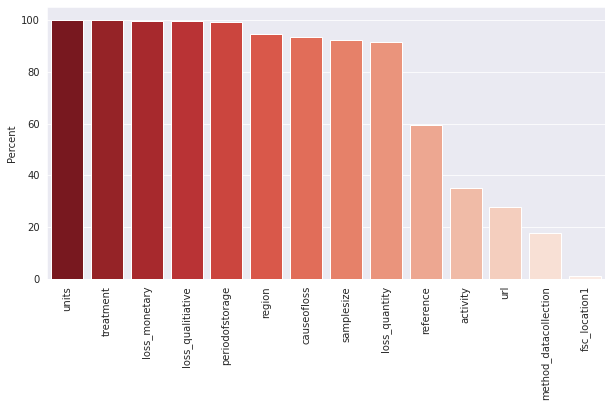

In [11]:
# set style to dark grid for all plots
sns.set_style('darkgrid')

# set a figure
plt.figure(figsize=(10, 5))

# visualize the percentage of missing values 
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)
plt.show()

### Fill in missing values

There are a lot of missing values for some of these columns. A general rule of thumb in the business is to set a threshold to for the number of missing values to impute in the data. If the data has less than 60 to 70 percent of missing values, then we can impute them, else we drop them.

In [12]:
# dropping columns with high percent of missing values
features = features.drop(['units', 'treatment', 'loss_monetary',	'loss_qualitiative',	'periodofstorage',	
                          'region', 'causeofloss',	'samplesize',	'loss_quantity'], axis=1)

The `NaN` value (Not a Number) indicates that that specific row value is null. This is our process to fill in the columns that have to be imputed:

*   If NaN means no presence of a value, we'll fill it in using either the mean, median or mode of that column. 

*   If NaN indicates that the value is an absence of quantity, we'll fill it in with 0.

*   Finally, if it is an actual missing value, we'll fill that in with the string 'None'.

The columns we'll impute are: 

1. `reference`
2. `activity`	
3. `url`	
4. `method_datacollection`
5. `fsc_location1`


In [13]:
## filling in the other columns 

features['reference'] = features.reference.fillna('None')
features['activity'] = features.activity.fillna(features.activity.mode()[0])
features['url'] = features.url.fillna('None')
features['method_datacollection'] = features.method_datacollection.fillna('None')

`fsc_location1` has a value **`-`** which indicates a null value. we will assign this to an NaN value and then fill those in with the mode.

In [14]:
features['fsc_location1'] = features.fsc_location1.replace('-', np.nan)

features['fsc_location1'] = features.fsc_location1.fillna(
    features['fsc_location1'].mode()[0])

In [15]:
features.isnull().sum()

geographicaream49        0
country                  0
measureditemcpc          0
crop                     0
timepointyears           0
loss_per_clean           0
activity                 0
fsc_location1            0
method_datacollection    0
tag_datacollection       0
reference                0
url                      0
dtype: int64

Looks like we have no more null values left in our features dataset. Our target variable has some missing values as well, which we'll impute using the mean of the column. It also looks like our target is assigned to the object dtype. We'll have to convert this to float.

In [16]:
y

0         1.79775798
1         1.79775798
2        5.219074683
3        5.426717684
4        5.614486626
            ...     
13635            2.3
13636            4.5
13637            0.5
13638              1
13639            1.3
Name: percentage_loss_of_quantity, Length: 13640, dtype: object

In [17]:
y.isnull().sum(), y.shape

(965, (13640,))

In [18]:
# fixing all the errors in the column
y = (y.str.split('-').str[0].str.split('%').str[0].str.split(' ').str[0]
     .str.replace('[0â€“24, 0â€“33]', '0').astype(float))

y.head()

0    1.797758
1    1.797758
2    5.019071
3    5.006718
4    5.610087
Name: percentage_loss_of_quantity, dtype: float64

In [19]:
# filling in the target variable
y = y.fillna(y.mean())

In [20]:
display(features.shape, features.head())

(15156, 12)

,geographicaream49,country,measureditemcpc,crop,timepointyears,loss_per_clean,activity,fsc_location1,method_datacollection,tag_datacollection,reference,url
0,100,Bulgaria,111.0,Wheat,2000,1.80,Transport to farm,SWS_Total,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,None
1,100,Bulgaria,111.0,Wheat,2000,1.80,Transport to farm,SWS_Total,Reuter,FAO Sources,FAO Sources,None
2,104,Myanmar,142.0,"Groundnuts, excluding shelled",2009,5.22,Transport to farm,SWS_Total,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,None
3,104,Myanmar,142.0,"Groundnuts, excluding shelled",2008,5.43,Transport to farm,SWS_Total,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,None
4,104,Myanmar,142.0,"Groundnuts, excluding shelled",2007,5.61,Transport to farm,SWS_Total,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,None


## Feature Engineering

Feature engineering is an entirely emipirical process. There are many ways to create features that can be used for our model. These are just some steps we can take to achieve results.


### Label Encoding and One Hot Encoding

In this part, we will encode and categorize features through assigning integers to each value of our object columns.

These are some of the different types: 

* One Hot Encoding, where the function creates multiple columns indicating the presence or absence of the value in the data represented in binary.
* Label encoding, where each value gets assigned an integer in the same column


In [21]:
# One hot encoding
features_dummies = pd.get_dummies(features)
features_dummies

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country_Afghanistan,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Benin,country_Bolivia (Plurinational State of),country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Chad,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Ecuador,country_Egypt,country_El Salvador,country_Eritrea,country_Estonia,country_Eswatini,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Honduras,country_Hungary,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Ireland,country_Israel,country_Italy,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Lesotho,country_Liberia,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Mauritius,country_Mexico,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Republic of Korea,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Lucia,country_Senegal,country_Serbia,country_Sierra Leone,country_Slovakia,country_Somalia,country_South Africa,country_South Sudan,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Tajikistan,country_Thailand,country_Timor-Leste,country_Togo,country_Trinidad and Tobago,country_Turkey,country_Uganda,country_Ukraine,country_United Kingdom,country_United Republic of Tanzania,country_United States of America,country_Venezuela (Bolivarian Republic of),...,reference_Silverio Garcia-Lara and David J. Bergvinson 2007,"reference_Study on Crop Production and Marketing in Northern Areas Development of Agriculture, Northern Areas",reference_Sukhbiret al. (2007),reference_Sukhbiret al. 2007,"reference_Taherzadeh, A.",reference_Tamale Poly Tech,reference_Tefera et al . ( 2011b ),"reference_Tekpor, (2011)","reference_Terry et al., 2011",reference_Thapa and Shrestha (2001/02),reference_Thapa and Shrestha 2001/02,reference_The World Bank,reference_Theresa Snow and Elana Dean,"reference_Thomas Reardon, Kevin Chen, Bart Minten and Lourdes Adriano (2012)",reference_Tomlins et al 2000,reference_Tomlins et al.,"reference_Troger, K.","reference_TrÃ¶gera et al, 2007",reference_UNFAO,reference_USAID,"reference_Udas et al, 2005","reference_Venice 2012, Fourth International Symposium on Energy from Biomass and Waste","reference_Vilela et al, 2003",reference_Virendra Kumar,"reference_WRAP, 2011","reference_Wadhwani & Brogal, 2003","reference_Wadhwanj & Brogal, 2003",reference_Wang & Bagshaw 2001,reference_Wang Xiangyang* and John S. Bagshaw,reference_Weinberger et al 2008,"reference_Xue Li et al, 2017",reference_Yahia 2005,"reference_Yeboah, (2011)",reference_Zulfiqar et al 2005,url_Http://Webarchive.Nationalarchives.Gov.Uk/20130123162956/Http://Www.Defra.Gov.Uk/Statistics/Files/Defra-Stats-Foodfarm-Crosscutting-Auk-Auk2011-120709.Pdf,url_IFPRI,url_None,url_http://ac.els-cdn.com/S0306919212000693/1-s2.0-S0306919212000693-main.pdf?_tid=c0f06a20-b878-11e6-8c5e-00000aab0f26&acdnat=1480674125_7a87adb11c23b174482e352a2f62d41f,url_http://academicjournals.org/article/article1379942599_Appiah%20et%20al.pdf,url_http://aciar.gov.au/files/node/2249/p105chapter1.pdf,url

In [22]:
# creating a copy of the data for label encoding
features_encoded = features.select_dtypes('object').copy()
features_encoded.head()

,country,crop,activity,fsc_location1,method_datacollection,tag_datacollection,reference,url
0,Bulgaria,Wheat,Transport to farm,SWS_Total,17/7/00 X State Farm Inform. System,FAO Sources,FAO Sources,None
1,Bulgaria,Wheat,Transport to farm,SWS_Total,Reuter,FAO Sources,FAO Sources,None
2,Myanmar,"Groundnuts, excluding shelled",Transport to farm,SWS_Total,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,None
3,Myanmar,"Groundnuts, excluding shelled",Transport to farm,SWS_Total,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,None
4,Myanmar,"Groundnuts, excluding shelled",Transport to farm,SWS_Total,Myanmar Agricultural Statistics (1997-98 To 20...,FAO Sources,FAO Sources,None


In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in features_encoded:
  features_encoded[col] = label_encoder.fit_transform(features_encoded[col])

In [25]:
features_encoded.head()

,country,crop,activity,fsc_location1,method_datacollection,tag_datacollection,reference,url
0,15,119,86,14,4,5,75,2
1,15,119,86,14,452,5,75,2
2,78,43,86,14,324,5,75,2
3,78,43,86,14,324,5,75,2
4,78,43,86,14,324,5,75,2


### Joining Dataframes

Now we'll join our dataframes together to create our finalized features dataframe.

In [27]:
features = pd.concat([features.select_dtypes(np.number), features_encoded, features_dummies], axis=1)
features.head()

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country,crop,activity,fsc_location1,method_datacollection,tag_datacollection,reference,url,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country_Afghanistan,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Benin,country_Bolivia (Plurinational State of),country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Chad,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Ecuador,country_Egypt,country_El Salvador,country_Eritrea,country_Estonia,country_Eswatini,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Honduras,country_Hungary,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Ireland,country_Israel,country_Italy,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Lesotho,country_Liberia,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Mauritius,country_Mexico,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Republic of Korea,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Lucia,country_Senegal,country_Serbia,country_Sierra Leone,country_Slovakia,country_Somalia,country_South Africa,country_South Sudan,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,...,reference_Silverio Garcia-Lara and David J. Bergvinson 2007,"reference_Study on Crop Production and Marketing in Northern Areas Development of Agriculture, Northern Areas",reference_Sukhbiret al. (2007),reference_Sukhbiret al. 2007,"reference_Taherzadeh, A.",reference_Tamale Poly Tech,reference_Tefera et al . ( 2011b ),"reference_Tekpor, (2011)","reference_Terry et al., 2011",reference_Thapa and Shrestha (2001/02),reference_Thapa and Shrestha 2001/02,reference_The World Bank,reference_Theresa Snow and Elana Dean,"reference_Thomas Reardon, Kevin Chen, Bart Minten and Lourdes Adriano (2012)",reference_Tomlins et al 2000,reference_Tomlins et al.,"reference_Troger, K.","reference_TrÃ¶gera et al, 2007",reference_UNFAO,reference_USAID,"reference_Udas et al, 2005","reference_Venice 2012, Fourth International Symposium on Energy from Biomass and Waste","reference_Vilela et al, 2003",reference_Virendra Kumar,"reference_WRAP, 2011","reference_Wadhwani & Brogal, 2003","reference_Wadhwanj & Brogal, 2003",reference_Wang & Bagshaw 2001,reference_Wang Xiangyang* and John S. Bagshaw,reference_Weinberger et al 2008,"reference_Xue Li et al, 2017",reference_Yahia 2005,"reference_Yeboah, (2011)",reference_Zulfiqar et al 2005,url_Http://Webarchive.Nationalarchives.Gov.Uk/20130123162956/Http://Www.Defra.Gov.Uk/Statistics/Files/Defra-Stats-Foodfarm-Crosscutting-Auk-Auk2011-120709.Pdf,url_IFPRI,url_None,url_http://ac.els-cdn.com/S0306919212000693/1-s2.0-S0306919212000693-main.pdf?_tid=c0f06a20-b878-11e6-8c5e-00000aab0f26&acdnat=1480674125_7a87adb11c23b174482e352a2f62d41f,url_http://academicjournals.org/article/article1379942599_Appiah%20et%20al.pdf,url_http://aciar.gov.au/files/node/2249/p105chapter1.pdf,url_http://aciar.gov.au/files/pr139.pdf,url_http://ageconsearch.umn.edu/bitstream/115554/2/11-3PICS.Maize-2.pdf,url_http://age

In [28]:
features.shape

(15156, 1294)

## Feature Selection
Once we're done with feature engineering we can select the best features to use in our model by selecting the best features based on univariate statistical tests.

Let's split the data back into train and test sets.

In [31]:
X = features.iloc[:len(y)]
X_test = features.iloc[len(y):]

display(y.head(), X.head(3), X_test.head(3))

0    1.797758
1    1.797758
2    5.019071
3    5.006718
4    5.610087
Name: percentage_loss_of_quantity, dtype: float64

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country,crop,activity,fsc_location1,method_datacollection,tag_datacollection,reference,url,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country_Afghanistan,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Benin,country_Bolivia (Plurinational State of),country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Chad,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Ecuador,country_Egypt,country_El Salvador,country_Eritrea,country_Estonia,country_Eswatini,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Honduras,country_Hungary,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Ireland,country_Israel,country_Italy,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Lesotho,country_Liberia,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Mauritius,country_Mexico,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Republic of Korea,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Lucia,country_Senegal,country_Serbia,country_Sierra Leone,country_Slovakia,country_Somalia,country_South Africa,country_South Sudan,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,...,reference_Silverio Garcia-Lara and David J. Bergvinson 2007,"reference_Study on Crop Production and Marketing in Northern Areas Development of Agriculture, Northern Areas",reference_Sukhbiret al. (2007),reference_Sukhbiret al. 2007,"reference_Taherzadeh, A.",reference_Tamale Poly Tech,reference_Tefera et al . ( 2011b ),"reference_Tekpor, (2011)","reference_Terry et al., 2011",reference_Thapa and Shrestha (2001/02),reference_Thapa and Shrestha 2001/02,reference_The World Bank,reference_Theresa Snow and Elana Dean,"reference_Thomas Reardon, Kevin Chen, Bart Minten and Lourdes Adriano (2012)",reference_Tomlins et al 2000,reference_Tomlins et al.,"reference_Troger, K.","reference_TrÃ¶gera et al, 2007",reference_UNFAO,reference_USAID,"reference_Udas et al, 2005","reference_Venice 2012, Fourth International Symposium on Energy from Biomass and Waste","reference_Vilela et al, 2003",reference_Virendra Kumar,"reference_WRAP, 2011","reference_Wadhwani & Brogal, 2003","reference_Wadhwanj & Brogal, 2003",reference_Wang & Bagshaw 2001,reference_Wang Xiangyang* and John S. Bagshaw,reference_Weinberger et al 2008,"reference_Xue Li et al, 2017",reference_Yahia 2005,"reference_Yeboah, (2011)",reference_Zulfiqar et al 2005,url_Http://Webarchive.Nationalarchives.Gov.Uk/20130123162956/Http://Www.Defra.Gov.Uk/Statistics/Files/Defra-Stats-Foodfarm-Crosscutting-Auk-Auk2011-120709.Pdf,url_IFPRI,url_None,url_http://ac.els-cdn.com/S0306919212000693/1-s2.0-S0306919212000693-main.pdf?_tid=c0f06a20-b878-11e6-8c5e-00000aab0f26&acdnat=1480674125_7a87adb11c23b174482e352a2f62d41f,url_http://academicjournals.org/article/article1379942599_Appiah%20et%20al.pdf,url_http://aciar.gov.au/files/node/2249/p105chapter1.pdf,url_http://aciar.gov.au/files/pr139.pdf,url_http://ageconsearch.umn.edu/bitstream/115554/2/11-3PICS.Maize-2.pdf,url_http://age

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country,crop,activity,fsc_location1,method_datacollection,tag_datacollection,reference,url,geographicaream49,measureditemcpc,timepointyears,loss_per_clean,country_Afghanistan,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Benin,country_Bolivia (Plurinational State of),country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Chad,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Ecuador,country_Egypt,country_El Salvador,country_Eritrea,country_Estonia,country_Eswatini,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Honduras,country_Hungary,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Ireland,country_Israel,country_Italy,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Lesotho,country_Liberia,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Mauritius,country_Mexico,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Republic of Korea,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Lucia,country_Senegal,country_Serbia,country_Sierra Leone,country_Slovakia,country_Somalia,country_South Africa,country_South Sudan,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,...,reference_Silverio Garcia-Lara and David J. Bergvinson 2007,"reference_Study on Crop Production and Marketing in Northern Areas Development of Agriculture, Northern Areas",reference_Sukhbiret al. (2007),reference_Sukhbiret al. 2007,"reference_Taherzadeh, A.",reference_Tamale Poly Tech,reference_Tefera et al . ( 2011b ),"reference_Tekpor, (2011)","reference_Terry et al., 2011",reference_Thapa and Shrestha (2001/02),reference_Thapa and Shrestha 2001/02,reference_The World Bank,reference_Theresa Snow and Elana Dean,"reference_Thomas Reardon, Kevin Chen, Bart Minten and Lourdes Adriano (2012)",reference_Tomlins et al 2000,reference_Tomlins et al.,"reference_Troger, K.","reference_TrÃ¶gera et al, 2007",reference_UNFAO,reference_USAID,"reference_Udas et al, 2005","reference_Venice 2012, Fourth International Symposium on Energy from Biomass and Waste","reference_Vilela et al, 2003",reference_Virendra Kumar,"reference_WRAP, 2011","reference_Wadhwani & Brogal, 2003","reference_Wadhwanj & Brogal, 2003",reference_Wang & Bagshaw 2001,reference_Wang Xiangyang* and John S. Bagshaw,reference_Weinberger et al 2008,"reference_Xue Li et al, 2017",reference_Yahia 2005,"reference_Yeboah, (2011)",reference_Zulfiqar et al 2005,url_Http://Webarchive.Nationalarchives.Gov.Uk/20130123162956/Http://Www.Defra.Gov.Uk/Statistics/Files/Defra-Stats-Foodfarm-Crosscutting-Auk-Auk2011-120709.Pdf,url_IFPRI,url_None,url_http://ac.els-cdn.com/S0306919212000693/1-s2.0-S0306919212000693-main.pdf?_tid=c0f06a20-b878-11e6-8c5e-00000aab0f26&acdnat=1480674125_7a87adb11c23b174482e352a2f62d41f,url_http://academicjournals.org/article/article1379942599_Appiah%20et%20al.pdf,url_http://aciar.gov.au/files/node/2249/p105chapter1.pdf,url_http://aciar.gov.au/files/pr139.pdf,url_http://ageconsearch.umn.edu/bitstream/115554/2/11-3PICS.Maize-2.pdf,url_http://age

### Displaying correlations with the target

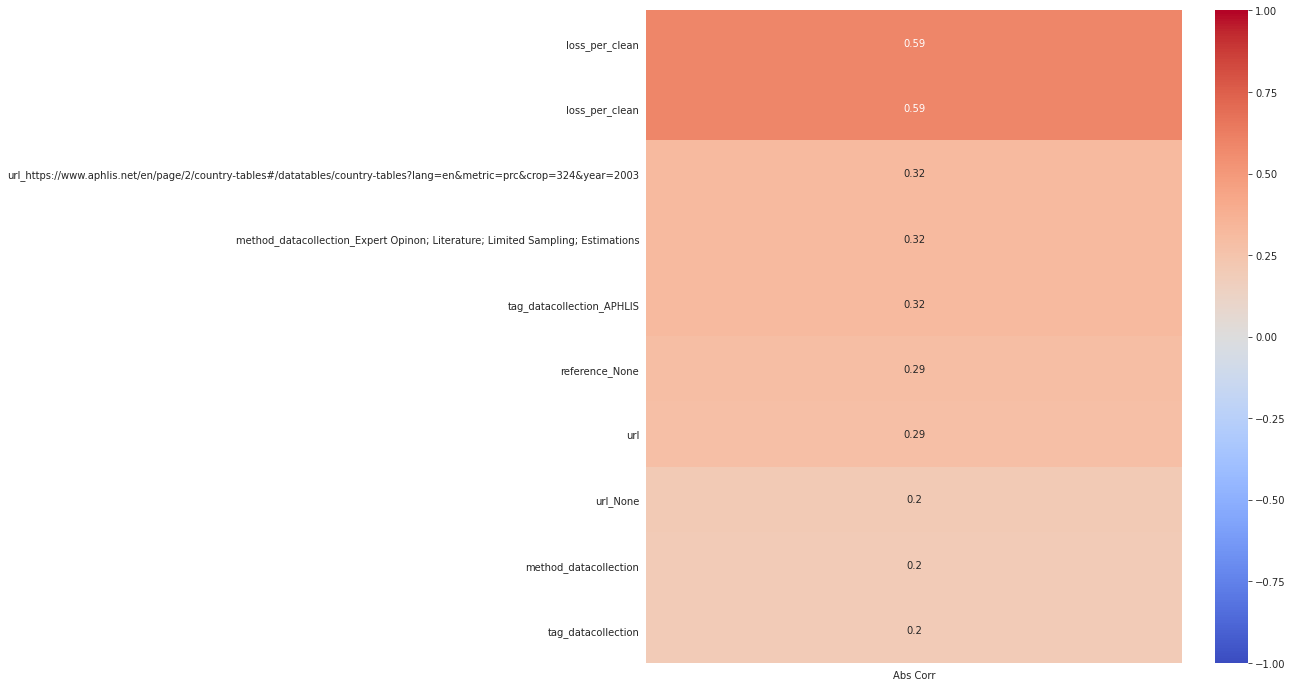

In [36]:
correlations = X.join(y).corrwith(X.join(y)['percentage_loss_of_quantity']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.2], cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

### Mutual Information Scores

A great first step is to construct a ranking between features is a utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially.

The metric we'll use is called "mutual information".

In [37]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

discrete_features = X.dtypes == int

mi_scores = make_mi_scores(X, y, discrete_features=False)

In [43]:
# selecting a subset of the best features
best_features = mi_scores[mi_scores > 0.000000].index.to_list()
best_features

['loss_per_clean',
 'loss_per_clean',
 'fsc_location1',
 'country',
 'geographicaream49',
 'geographicaream49',
 'reference',
 'activity',
 'tag_datacollection',
 'crop',
 'measureditemcpc',
 'measureditemcpc',
 'url',
 'method_datacollection',
 'tag_datacollection_APHLIS',
 'url_https://www.aphlis.net/en/page/2/country-tables#/datatables/country-tables?lang=en&metric=prc&crop=324&year=2003',
 'method_datacollection_Expert Opinon; Literature; Limited Sampling; Estimations',
 'reference_None',
 'url_None',
 'reference_FAO Sources',
 'fsc_location1_SWS_Total',
 'tag_datacollection_Food Balance Sheet/Ag. Production Questionnaire',
 'country_Turkey',
 'fsc_location1_WholeSupplyChain',
 'activity_Transport to farm',
 'fsc_location1_Farm',
 'method_datacollection_None',
 'activity_Market storage',
 'activity_Transport to market',
 'fsc_location1_Wholesale',
 'fsc_location1_Transport',
 'timepointyears',
 'timepointyears',
 'crop_Maize (corn)',
 'crop_Sorghum',
 'activity_Harvesting/field dry

In [45]:
# using only those features for training and testing
X = X[best_features].copy()
X_test = X_test[best_features].copy()

## Model Creation
We'll select some regression models, train them on the training data using cross validation and see which one of them performs the best during the validation process.

### Importing regression models

In [47]:
# !pip install catboost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [49]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LinearRegression, SGDRegressor, BayesianRidge
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor


In [50]:
LinearRegression = LinearRegression()
SGDRegressor = SGDRegressor()
BayesianRidge = BayesianRidge()
LGBMRegressor = LGBMRegressor()
CatBoostRegressor = CatBoostRegressor()
KernelRidge = KernelRidge()
ElasticNet = ElasticNet()
GradientBoostingRegressor = GradientBoostingRegressor()
RandomForestRegressor = RandomForestRegressor()
SVR = SVR()
XGBRegressor = XGBRegressor()

In [51]:
# Setting kfold for future use.

kf = KFold(10, random_state=42, shuffle=True)

In [52]:
from sklearn.metrics import mean_absolute_error

### Model validation

In [53]:
def model_check(X, y, estimators, cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_mean_absolute_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train MAE'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test MAE'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test MAE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [54]:
# Setting list of estimators and labels for the function:

estimators = [LinearRegression,
SGDRegressor,
BayesianRidge,
LGBMRegressor,
CatBoostRegressor,
KernelRidge,
ElasticNet,
GradientBoostingRegressor,
RandomForestRegressor,
SVR,
XGBRegressor]

labels = ['LinearRegression',
'SGDRegressor',
'BayesianRidge',
'LGBMRegressor',
'CatBoostRegressor',
'KernelRidge',
'ElasticNet',
'GradientBoostingRegressor',
'RandomForestRegressor',
'SVR',
'XGBRegressor']

In [55]:
# comparing models
raw_models = model_check(X, y, estimators, kf)
display(raw_models.style.background_gradient(cmap='autumn'))

,Model Name,Train MAE,Test MAE,Test Std,Time
8,RandomForestRegressor,0.057724,0.158656,0.025814,46.558902
7,GradientBoostingRegressor,0.439613,0.475262,0.036861,18.288392
2,BayesianRidge,1.497335,1.630984,0.095506,5.055073
5,KernelRidge,1.503530,1.631616,0.093356,48.601384
9,SVR,1.849002,1.849758,0.090257,143.481300
6,ElasticNet,1.938615,1.941096,0.070080,7.307639
0,LinearRegression,1.460881,306.660367,819.790268,2.279100
1,SGDRegressor,7726310195296754.000000,7682975689203696.000000,5821265347806786.000000,1.962427
3,LGBMRegressor,nan,nan,nan,1.126295
4,CatBoostRegressor,nan,nan,nan,0.115973


In [56]:
X.shape, y.shape, X_test.shape

((13640, 762), (13640,), (1516, 762))

## Model Testing

Now that we have a good comparision over how these different models perform in validation, we can use the best model for testing.

In [57]:
RandomForestRegressor.fit(X, y)
preds = RandomForestRegressor.predict(X_test)


In [71]:
test_set_label = test_set.percentage_loss_of_quantity

In [72]:
test_set_label = (test_set_label.str.split('-').str[0].str.split('%').str[0].str.split(' ').str[0]
 .str.split('+').str[0].str.replace('[0â€“24, 0â€“33]', '0').astype(float))
test_set_label

13640    0.5
13641    0.7
13642    0.1
13643    0.0
13644    1.0
        ... 
15151    0.6
15152    0.8
15153    5.0
15154    0.0
15155    0.6
Name: percentage_loss_of_quantity, Length: 1516, dtype: float64

In [75]:
test_set_label = test_set_label.fillna(test_set_label.mean())

In [76]:
mean_absolute_error(preds, test_set_label)

0.26612582428836046

## Results

Looks like our model performed well with only a slight difference (0.2 units) between our predicted label and the actual test label. 

This means we could potentially use the model to predict the percentage of yield lost in harvesting for crops all over the world.

This marks the end of my project.